In [2]:
# import featuretools as fts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
TRAIN_DIR = "../data/TRAIN.CSV"
TEST_DIR = "../data/TEST_FINAL.csv"

In [4]:
train = pd.read_csv(TRAIN_DIR)
test = pd.read_csv(TEST_DIR)

In [59]:
store1_train= train[train['Store_id']==1].reset_index()
store1_train


,index,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000608,T1000608,1,S1,L3,R1,2018-01-02,0,Yes,60,42369.00
2,T1001047,T1001047,1,S1,L3,R1,2018-01-03,0,Yes,72,50037.00
3,T1001208,T1001208,1,S1,L3,R1,2018-01-04,0,Yes,64,44397.00
4,T1001753,T1001753,1,S1,L3,R1,2018-01-05,0,Yes,63,47604.00
...,...,...,...,...,...,...,...,...,...,...,...
511,T1186570,T1186570,1,S1,L3,R1,2019-05-27,0,Yes,53,33075.00
512,T1187166,T1187166,1,S1,L3,R1,2019-05-28,0,Yes,57,37317.00
513,T1187392,T1187392,1,S1,L3,R1,2019-05-29,0,Yes,69,44652.00
514,T1187963,T1187963,1,S1,L3,R1,2019-05-30,0,Yes,66,42387.00


In [25]:
store1_test = test[test['Store_id']==1]
store1_test

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
310,T1188651,1,S1,L3,R1,2019-06-01,0,No
709,T1189050,1,S1,L3,R1,2019-06-02,0,No
996,T1189337,1,S1,L3,R1,2019-06-03,0,No
1291,T1189632,1,S1,L3,R1,2019-06-04,0,No
1796,T1190137,1,S1,L3,R1,2019-06-05,1,No
...,...,...,...,...,...,...,...,...
20746,T1209087,1,S1,L3,R1,2019-07-27,0,Yes
21166,T1209507,1,S1,L3,R1,2019-07-28,0,Yes
21417,T1209758,1,S1,L3,R1,2019-07-29,0,Yes
21623,T1209964,1,S1,L3,R1,2019-07-30,0,No


## Thank God no missing values

In [26]:
train.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [126]:
516 *0.8

412.8

In [32]:
assert train['Store_id'].unique().shape[0]*516 ==train.shape[0]

In [46]:
train_cols = ["Store_id","Store_Type","Location_Type","Region_Code","Holiday"]

In [34]:
store1_train

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
T1000001,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
T1000608,T1000608,1,S1,L3,R1,2018-01-02,0,Yes,60,42369.00
T1001047,T1001047,1,S1,L3,R1,2018-01-03,0,Yes,72,50037.00
T1001208,T1001208,1,S1,L3,R1,2018-01-04,0,Yes,64,44397.00
T1001753,T1001753,1,S1,L3,R1,2018-01-05,0,Yes,63,47604.00
...,...,...,...,...,...,...,...,...,...,...
T1186570,T1186570,1,S1,L3,R1,2019-05-27,0,Yes,53,33075.00
T1187166,T1187166,1,S1,L3,R1,2019-05-28,0,Yes,57,37317.00
T1187392,T1187392,1,S1,L3,R1,2019-05-29,0,Yes,69,44652.00
T1187963,T1187963,1,S1,L3,R1,2019-05-30,0,Yes,66,42387.00


In [38]:
store1_train.drop('Date',axis=1)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
T1000001,T1000001,1,S1,L3,R1,1,Yes,9,7011.84
T1000608,T1000608,1,S1,L3,R1,0,Yes,60,42369.00
T1001047,T1001047,1,S1,L3,R1,0,Yes,72,50037.00
T1001208,T1001208,1,S1,L3,R1,0,Yes,64,44397.00
T1001753,T1001753,1,S1,L3,R1,0,Yes,63,47604.00
...,...,...,...,...,...,...,...,...,...
T1186570,T1186570,1,S1,L3,R1,0,Yes,53,33075.00
T1187166,T1187166,1,S1,L3,R1,0,Yes,57,37317.00
T1187392,T1187392,1,S1,L3,R1,0,Yes,69,44652.00
T1187963,T1187963,1,S1,L3,R1,0,Yes,66,42387.00


In [43]:
def get_datetime_features(df):
    df['Date'] = pd.to_datetime(df['Date'])
    new_df = pd.DataFrame()
    new_df['Month'] = df['Date'].dt.month
    new_df['day'] = df['Date'].dt.day
    new_df['year'] = df['Date'].dt.year
    new_df['quarter'] = df['Date'].dt.quarter
    new_df['dayofweek'] = df['Date'].dt.dayofweek
#     new_df['dayofyear'] = df['Date'].dt
#     new_df['quarter'] = df['Date'].dt.quarter

#     dayofweek

    df = df.drop('Date',axis=1)
    res=pd.concat([df,new_df],axis=1)
    assert res.shape[0]==df.shape[0]
    return res

In [48]:
store1_train1= get_datetime_features(store1_train[train_cols+["Date"]])

In [49]:
store1_train1

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Month,day,year,quarter,dayofweek
T1000001,1,S1,L3,R1,1,1,1,2018,1,0
T1000608,1,S1,L3,R1,0,1,2,2018,1,1
T1001047,1,S1,L3,R1,0,1,3,2018,1,2
T1001208,1,S1,L3,R1,0,1,4,2018,1,3
T1001753,1,S1,L3,R1,0,1,5,2018,1,4
...,...,...,...,...,...,...,...,...,...,...
T1186570,1,S1,L3,R1,0,5,27,2019,2,0
T1187166,1,S1,L3,R1,0,5,28,2019,2,1
T1187392,1,S1,L3,R1,0,5,29,2019,2,2
T1187963,1,S1,L3,R1,0,5,30,2019,2,3


In [54]:
store1_train2= pd.get_dummies(store1_train1)
store1_train2

,Store_id,Holiday,Month,day,year,quarter,dayofweek,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4
T1000001,1,1,1,1,2018,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
T1000608,1,0,1,2,2018,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0
T1001047,1,0,1,3,2018,1,2,1,0,0,0,0,0,1,0,0,1,0,0,0
T1001208,1,0,1,4,2018,1,3,1,0,0,0,0,0,1,0,0,1,0,0,0
T1001753,1,0,1,5,2018,1,4,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1186570,1,0,5,27,2019,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0
T1187166,1,0,5,28,2019,2,1,1,0,0,0,0,0,1,0,0,1,0,0,0
T1187392,1,0,5,29,2019,2,2,1,0,0,0,0,0,1,0,0,1,0,0,0
T1187963,1,0,5,30,2019,2,3,1,0,0,0,0,0,1,0,0,1,0,0,0


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error


In [75]:
rf = RandomForestRegressor(n_estimators=100)

rf.fit(store1_train2.iloc[:400],store1_train.loc[:399,'Sales'])

RandomForestRegressor()

In [136]:
prediction = rf.predict(store1_train2.iloc[400:])

In [137]:
prediction

array([24374.37  , 31784.46  , 35980.62  , 38487.75  , 38115.93  ,
       39548.1627, 31601.6757, 29601.3054, 38949.81  , 37875.24  ,
       36346.56  , 28493.7351, 30883.4421, 32649.69  , 28729.8687,
       36789.93  , 35487.99  , 33616.95  , 43236.3   , 37076.8611,
       32679.45  , 28725.06  , 29037.72  , 26847.42  , 23304.1206,
       43230.156 , 44185.266 , 33390.5856, 28640.28  , 29328.15  ,
       34598.76  , 36216.51  , 40105.35  , 35947.8204, 36384.8157,
       33777.7854, 41282.22  , 40002.66  , 39516.567 , 31458.3903,
       32607.2721, 34203.39  , 35322.96  , 25379.9349, 26428.9104,
       30268.41  , 42205.29  , 34070.4111, 29863.62  , 25563.75  ,
       27741.6   , 27357.3804, 28704.45  , 35222.6211, 45550.8411,
       28570.65  , 25840.89  , 28605.12  , 30043.95  , 33927.78  ,
       30612.0447, 39178.7604, 29302.26  , 35015.97  , 42526.41  ,
       44296.2   , 39267.63  , 31632.5196, 31040.3328, 36752.214 ,
       36274.9554, 27681.1614, 29070.78  , 26024.8974, 32949.4

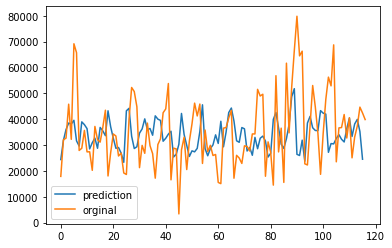

In [77]:
plt.plot(prediction,label='prediction')
plt.plot(store1_train.loc[399:,'Sales'].reset_index(drop=True),label='orginal')
plt.legend()
plt.show()

In [72]:
store1_train.loc[399:,'Sales'].reset_index(drop=True)

0      17865.00
1      32028.00
2      32664.00
3      45789.00
4      32196.00
         ...   
112    33075.00
113    37317.00
114    44652.00
115    42387.00
116    39843.78
Name: Sales, Length: 117, dtype: float64

In [80]:
mean_squared_log_error(prediction,store1_train.loc[400:,'Sales'].reset_index(drop=True))

0.17282566280270847

## lets do it for complete data

In [98]:
train_dataset = get_datetime_features(train[train_cols+['Date']]).reset_index(drop=True)
train_dataset = pd.get_dummies(train_dataset)
train_dataset

,Store_id,Holiday,Month,day,year,quarter,dayofweek,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,1,1,1,1,2018,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,253,1,1,1,2018,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,252,1,1,1,2018,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,251,1,1,1,2018,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,250,1,1,1,2018,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,149,1,5,31,2019,2,4,0,1,0,0,0,0,1,0,0,0,1,0,0
188336,153,1,5,31,2019,2,4,0,0,0,1,0,1,0,0,0,1,0,0,0
188337,154,1,5,31,2019,2,4,1,0,0,0,0,0,1,0,0,0,1,0,0
188338,155,1,5,31,2019,2,4,0,0,1,0,1,0,0,0,0,0,1,0,0


In [89]:
from xgboost import XGBRegressor,XGBRFRegressor

In [102]:
model =XGBRegressor(objective="reg:squaredlogerror")
model.fit(train_dataset,train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1,
             objective='reg:squaredlogerror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [116]:
test_dataset = get_datetime_features(test[train_cols+['Date']]).reset_index(drop=True)
test_dataset = pd.get_dummies(test_dataset)
test_dataset

,Store_id,Holiday,Month,day,year,quarter,dayofweek,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,171,0,6,1,2019,2,5,0,0,0,1,0,1,0,0,0,0,0,1,0
1,172,0,6,1,2019,2,5,1,0,0,0,1,0,0,0,0,1,0,0,0
2,173,0,6,1,2019,2,5,0,0,0,1,0,1,0,0,0,1,0,0,0
3,174,0,6,1,2019,2,5,1,0,0,0,1,0,0,0,0,0,0,0,1
4,170,0,6,1,2019,2,5,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,186,0,7,31,2019,3,2,0,1,0,0,0,0,0,0,1,0,1,0,0
22261,11,0,7,31,2019,3,2,0,0,0,1,0,1,0,0,0,1,0,0,0
22262,185,0,7,31,2019,3,2,1,0,0,0,1,0,0,0,0,0,0,1,0
22263,69,0,7,31,2019,3,2,1,0,0,0,1,0,0,0,0,0,0,0,1


In [117]:
preds = model.predict(test_dataset)
np.unique(preds)

array([1004.5231, 1004.5337, 1004.5867], dtype=float32)

In [133]:
test_dataset['preds'] =preds


In [134]:
check = test_dataset[test_dataset['Store_id']==1]['preds'].reset_index(drop=True)
check

0     1004.523071
1     1004.523071
2     1004.523071
3     1004.523071
4     1004.523071
         ...     
56    1004.523071
57    1004.523071
58    1004.523071
59    1004.523071
60    1004.523071
Name: preds, Length: 61, dtype: float32

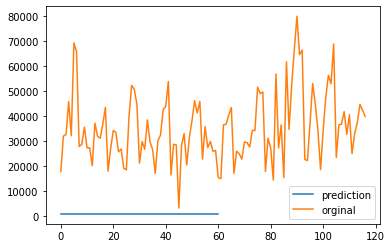

In [135]:
plt.plot(check,label='prediction')
plt.plot(store1_train.loc[399:,'Sales'].reset_index(drop=True),label='orginal')
plt.legend()
plt.show()

In [119]:
dir(model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_can_use_inplace_predict',
 '_check_n_features',
 '_configure_fit',
 '_early_stopping_attr',
 '_estimator_type',
 '_get_iteration_range',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 'apply',
 'base_score',
 'best_iteration',
 'best_ntree_limit',
 'best_score',
 'booster',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_booster',
 'get_num_boosting_rounds',
 'ge

In [125]:
model.

In [127]:
33151.70124217424

33151.70124217424

In [ ]:
43
rf : 44.88294147524408

In [129]:
train

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
T1000001,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
T1000002,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
T1000003,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
T1000004,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
T1000005,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
T1188336,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
T1188337,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
T1188338,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
T1188339,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [130]:
preds

array([1004.5867, 1004.5337, 1004.5867, ..., 1004.5337, 1004.5337,
       1004.5337], dtype=float32)